# **Quests 1 - Familiarizando-se com os datasets didáticos**

Grupo: Júlia Guedes Almeida dos Santos, Raquel de Godoy Vianna e Thalles José de Souza Cansi

``"Quem não arrisca não petisca"``

## **Enunciado**

O módulo seaborn tem vários datasets didáticos embutidos nele. Veja a função load_dataset no link https://seaborn.pydata.org/generated/seaborn.load_dataset.html para se informar mais. Seu objetivo é explorar pelo menos 3 datasets deste repositório. Espera-se que os datasets sejam carregados e exibidos. É necessário buscar o que significa cada coluna do dataset e escrever de maneira clara na entrega. Faça pelo menos um gráfico utilizando estes dados e compute algumas estatísticas descritivas. Discuta brevemente sobre o que observou.


## **Introdução**

Esse é o primeiro de muitos diários da Aliança da Supernova, onde registraremos nossas aventuras e nossos progressos visando nosso principal objetivo: Revolucionar a guilda dos cavaleiros e acabar com a homogeneidade dessa classe, promovendo a individualidade e questionando a União Total. Nossa motivação, a razão pela qual lutamos: a perpetuação de subdivisões na guilda dos cavaleiros, que possibilitará a valorização dos talentos individuais e, consequentemente, uma atuação mais eficiente dos cavaleiros no reino de Lumi!!


### Diário Um - Nossa primeira missão!

Hoje temos um objetivo: Estudar sobre carros. E o por quê? Precisamos começar a nos locomover para cada vez mais longe no reino de Lumi com o objetivo de recrutar mais integrantes para a Aliança da Supernova (e para isso precisamos de carros!).

Esse trabalho tem como objetivo explorar três datasets da biblioteca Seaborn: "Car-crash", "taxis" e "mpg". Serão realizadas análises referentes a estatística descritiva (média, moda, mediana, desvio padrão, dentre outras), bem como plotagem de gráficos, para a melhor compreensão dos dados fornecidos. 


## **Código**

### Importação de bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as st
from matplotlib import pyplot as plt
from scipy.stats import linregress



### Definição dos dataframes

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df_carro = sns.load_dataset('car_crashes')
df_taxis = sns.load_dataset('taxis')
df_mpg = sns.load_dataset('mpg')

### Funções para a análise exploratória

In [5]:
def media(coluna):
    media = np.nanmean(coluna)
    print(f"A média é {media:.2f}")
   
def mediana(coluna):
    mediana = np.nanmedian(coluna)
    print(f"A mediana é {mediana:.2f}")
 
def moda(coluna):
    moda = st.mode(coluna)
    print(f"A moda é {moda}")
 
def desvio_padrao(coluna):
    desvio_padrao = np.std(coluna)
    print(f"O desvio padrão é {desvio_padrao:.2f}")
 
def valores_minimos(coluna):
    valor_minimo = min(coluna)
    print(f"O valor mínimo é {valor_minimo:.2f}")
 
def valores_maximos(coluna):
    valor_maximo = max(coluna)
    print(f"O valor máximo é {valor_maximo:.2f}")
 
def quartis(coluna):
    quartis = st.quantiles(coluna, n=4) 
    primeiro_quartil = quartis[0]
    segundo_quartil = quartis[1]
    terceiro_quartil = quartis[2]
    print(f"O primeiro quartil é igual a {primeiro_quartil:.2f}, o valor do segundo quartil é igual a {segundo_quartil:.2f} e o valor do terceiro quartil é igual a {terceiro_quartil:.2f}")

In [6]:
def analise_dados(dataframe, coluna):
    dados = dataframe[coluna]
    if dataframe[coluna].dtypes == int or dataframe[coluna].dtypes == float:
        print(f"Análise dos dados - {coluna}")
        valores_minimos(dados)
        valores_maximos(dados)
        media(dados)
        mediana(dados)
        desvio_padrao(dados)
        quartis(dados)
        print("\n")
    else:
        moda(dados)
        print("\n")

In [7]:
def grafico_scatter(df, eixo_x, eixo_y, titulo):
    plt.scatter(df[eixo_x], df[eixo_y])
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    plt.title(titulo, fontsize = 12, fontweight = "bold")
    plt.show()
    

In [8]:
def boxplot(coluna, nome_da_coluna, valores):
    if coluna.isnull().values.any() == True:
        df = coluna.dropna()
    else:
        df = coluna
    eixo = sns.boxplot(y=df)
    eixo.set_title(f"{nome_da_coluna}", fontweight = "bold", fontsize = 12)
    eixo.set_xlabel("Frequência")
    eixo.set_ylabel(valores)
    plt.show()
    

In [9]:
def valor_esperado(X):
    val_esp = st.mean(X)
    return val_esp

def covariancia(X, Y):
    ve_x = valor_esperado(X)
    ve_y = valor_esperado(Y)
    dif_x = np.array(X) - ve_x
    dif_y = np.array(Y) - ve_y

    cov = valor_esperado(dif_x - dif_y)

    return cov

def coeficiente_pearson(X, Y):
    cov = covariancia(X, Y)
    dp_x = st.stdev(X)
    dp_y = st.stdev(Y)
    coeficiente_pearson = cov/(dp_x * dp_y)
    return coeficiente_pearson

## **Análise dos datasets escolhidos**

In [10]:
df_carro

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


### Análise - "Car Crashes"

O dataset "Car Crashes" expõe dados sobre acidentes de carros nos Estados Unidos, divididos por estados. Em relação a suas colunas, pode-se dizer que:
* total: Quantidade de acidentes fatais por bilhão de milhas percorridas. (Dado quantitativo contínuo**)
* speeding:	Percentual de acidentes fatais relacionados com excesso de velocidade. (Dado quantititativo contínuo)
* alcohol: Percentual de acidentes fatais relacionados com ingestão de bebidas alcoólicas. (Dado quantitativo contínuo)
* not_distracted: Percentual de acidentes fatais que envolviam motoristas não distraídos. (Dado quantitativo contínuo)
* no_previous: Percentual de acidentes fatais ocasionados por motoristas que não tinham sofrido acidentes antes. (Dado quantitativo contínuo)
* ins_premium:  prêmio de um seguro de carro, isto é, valor que deve ser pago à seguradora por aquele que contrata uma apólice, em dólares. [2] (Dado quantitativo discreto)
* ins_losses: Perdas da seguradora por cada colisão de um motorista assegurado, em dólares.  (Dado quantitativo discreto)	
* abbrev: Abreviação do nome do estado. (Dado qualitativo nominal)

** Vale ressaltar que a quantidade de acidentes é uma variável *discreta* (não é possível sofrer meio acidente). No entanto, esse dado foi normalizado (colocado na escala de bilhão de milhas percorridas) e, portanto, pode assumir valores contínuos.

In [11]:
analise_dados(df_carro, "ins_premium")

Análise dos dados - ins_premium
O valor mínimo é 641.96
O valor máximo é 1301.52
A média é 886.96
A mediana é 858.97
O desvio padrão é 176.54
O primeiro quartil é igual a 767.91, o valor do segundo quartil é igual a 858.97 e o valor do terceiro quartil é igual a 1011.14




In [12]:
analise_dados(df_carro, "ins_losses")

Análise dos dados - ins_losses
O valor mínimo é 82.75
O valor máximo é 194.78
A média é 134.49
A mediana é 136.05
O desvio padrão é 24.59
O primeiro quartil é igual a 114.47, o valor do segundo quartil é igual a 136.05 e o valor do terceiro quartil é igual a 152.26




Para ambas as colunas é possível observar que há uma distribuição homogênea dos dados, dado que os valores de média e mediana encontram-se muito próximos. Além disso, nota-se que os ganhos representam um valor muito mais significativo do que as perdas para as seguradoras analisadas.

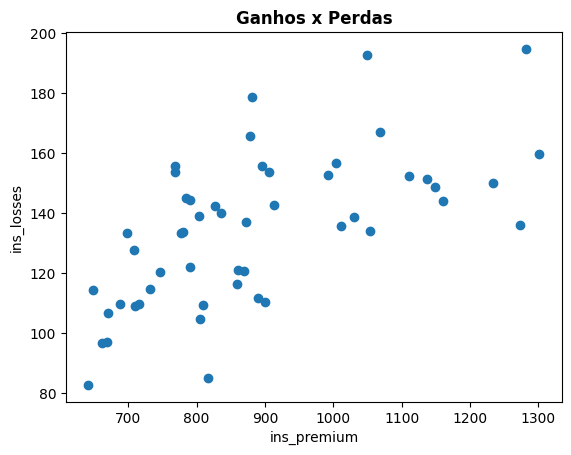

In [13]:
grafico_scatter(df_carro, "ins_premium", "ins_losses", "Ganhos x Perdas")

In [14]:
resultado = linregress(df_carro["ins_premium"], df_carro["ins_losses"])

print("beta_0:", resultado.intercept)
print("beta_1:", resultado.slope)

beta_0: 57.50743192625349
beta_1: 0.0867974988252655


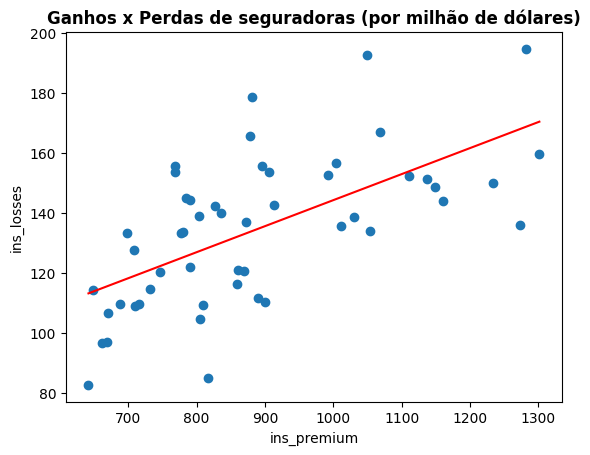

In [15]:
eixo_x = "ins_premium"
eixo_y = "ins_losses"

beta0 = 57.50743192625349
beta1 = 0.0867974988252655

x = np.linspace(np.min(df_carro[eixo_x]), np.max(df_carro[eixo_x]), 100)
y = beta0 + beta1 * x

plt.scatter(df_carro[eixo_x], df_carro[eixo_y])
plt.plot(x, y, color="red")
plt.xlabel(eixo_x)
plt.ylabel(eixo_y)
plt.title("Ganhos x Perdas de seguradoras (por milhão de dólares)", fontsize = 12, fontweight = "bold")
plt.show()

In [16]:
round(coeficiente_pearson(df_carro["ins_premium"], df_carro["ins_losses"]), 5)

-0.0

Com base no gráfico acima e no resultado obtido pelo coeficiente de Pearson, foi possível concluir que os dados de perda e ganho de seguradoras, não possuem uma relação linear entre si. Ou seja, apenas com o dado relativo a contratação da apólice, não é possível estimar a perda média das seguradoras. 

### Análise - "MPG"

In [17]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


O dataset "MPG" apresenta dados acerca de características de diferentes modelos de carro. Abaixo, cada uma de suas colunas é brevemente analisada:
* mpg: Quantidade de milhas percorridas com um galão de gasolina. (Dado quantitativo contínuo)
* cylinders: Número de cilindros no motor do carro. (Dado quantitativo discreto)
* displacement: Capacidade do motor do carro, consiste na cilindrada [3], isto é, no volume de deslocamento do motor, em polegadas cúbicas. (Dado quantitativo contínuo)
* horsepower: Quantidade de cavalos de potência do carro. (Dado quantitativo discreto)
* weight: Peso do veículo em libras. (Dado quantitativo contínuo)
* acceleration: Mede o tempo necessário para o automóvel partir de 0 e chegar a 100 km/h. (Dado quantitativo contínuo)
* model_year: Ano do modelo do carro. (Dado quantitativo discreto)
* origin: Origem do carro, isto é, representa onde ele foi produzido, seguindo o seguinte esquema: 1 = Americano, 2 = Europeu, 3 = Japonês (Dado qualitativo nominal)
* name: Nome do modelo do carro. (Dado qualitativo nominal)

In [18]:
analise_dados(df_mpg, "horsepower")

Análise dos dados - horsepower
O valor mínimo é 46.00
O valor máximo é 230.00
A média é 104.47
A mediana é 93.50
O desvio padrão é 38.44
O primeiro quartil é igual a 58.50, o valor do segundo quartil é igual a 115.00 e o valor do terceiro quartil é igual a 90.50




Com base nos dados observados, devido à observação dos valores mínimo e máximo, nota-se que o máximo consiste em um valor muito discrepante do mínimo e da média, o que denota que há valores que fogem da homogeneidade desses dados - outliers - (algo expresso também pelo desvio padrão), bem como podemos considerar que a maior parte dos dados encontra-se acima do valor da mediana, levando em consideração a média. Contudo, mesmo assim, haja vista o valor da média e da mediana serem relativamente próximos, é coerente supor que esse é um conjunto de dados que pode ser considerado, de certa forma, homogêneo.

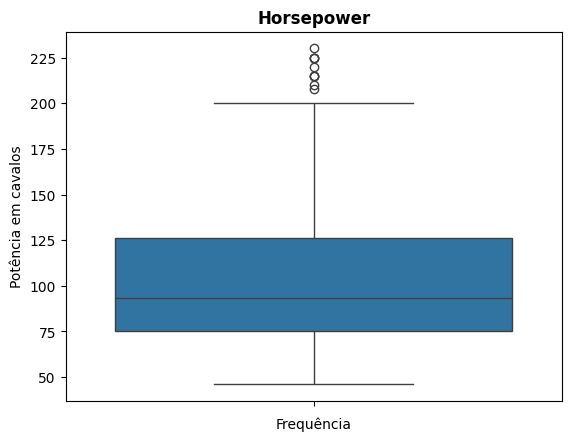

In [19]:
boxplot(df_mpg["horsepower"], "Horsepower", "Potência em cavalos")

Levando em consideração o boxplot acima, nota-se que, de fato, o conjunto de dados analisado é relativamente homogêneo. Porém, além disso, vale ressaltar que é possível notar dados que se distanciam dos demais, estes estão representados na imagem acima como pontos.

### Análise - "taxis"

In [20]:
df_taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


O dataset "taxis" apresenta dados sobre viagens de táxi em Nova Iorque. Abaixo, cada uma de suas colunas é analisada de forma breve:
* pickup: Data e horário em que o passageiro pegou o táxi
* dropoff: Data e horário em que o passageiro saiu do táxi - cheogu ao destino
* passengers: Quantidade de passageiros transportados pelo táxi na viagem. (Dado quantitativo discreto)
* distance: Distância percorrida pelo táxi em milhas no decorrer da viagem. (Dado quantitativo contínuo)
* fare: Taxa discriminada da viagem de táxi. (Dado quantitativo contínuo)
* tip: Quantidade de gorjeta dada ao taxista em dólares. (Dado quantitativo contínuo)
* tolls: Quantidade de pedágios no decorrer a viagem. (Dado quantitativo discreto)
* total: Custo total da viagem em dólares. (Dado quantitativo discreto)
* color: Cor do táxi. (Dado qualitativo nominal)
* payment: Modo de pagamento da viagem. (Dado qualitativo nominal)
* pickup_zone: Região de saída do táxi - em que o passageiro embarcou no táxi. (Dado qualitativo nominal)
* dropoff_zone: Destino final do táxi - onde o passageiro saiu, desembarcou dele. (Dado qualitativo nominal)
* pickup_borough: Bairro ou distrito em que o passageiro iniciou a viagem do táxi. (Dado qualitativo nominal)
* dropoff_borough: Bairro ou distrito em que o passageiro desembarcou do táxi, isto é, o destino final da viagem. (Dado qualitativo nominal)

In [21]:
analise_dados(df_taxis, "distance")

Análise dos dados - distance
O valor mínimo é 0.00
O valor máximo é 36.70
A média é 3.02
A mediana é 1.64
O desvio padrão é 3.83
O primeiro quartil é igual a 0.98, o valor do segundo quartil é igual a 1.64 e o valor do terceiro quartil é igual a 3.21




In [22]:
analise_dados(df_taxis, "total")

Análise dos dados - total
O valor mínimo é 1.30
O valor máximo é 174.82
A média é 18.52
A mediana é 14.16
O desvio padrão é 13.81
O primeiro quartil é igual a 10.80, o valor do segundo quartil é igual a 14.16 e o valor do terceiro quartil é igual a 20.30




A partir das análises dos dados acima, é notório que, tanto o custo total da corrida de táxi quanto a distância percorrida durante a viagem variam consideravelmente, sendo valores que não seguem uma homogeneidade, conclusão amparada pela discrepância entre os valores de média e mediana, assim como dos máximos e mínimos, bem como do desvio padrão.

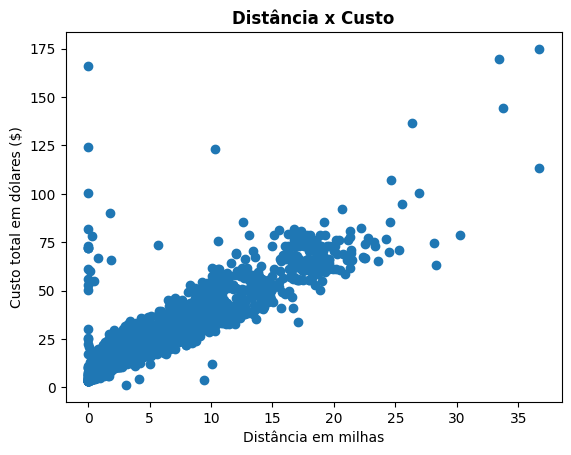

In [23]:
plt.scatter(df_taxis['distance'], df_taxis['total'])
plt.xlabel("Distância em milhas")
plt.ylabel( "Custo total em dólares ($)")
plt.title("Distância x Custo", fontsize = 12, fontweight = "bold")
plt.show()
    

In [24]:
resultado = linregress(df_taxis["distance"], df_taxis["total"])

print("beta_0:", resultado.intercept)
print("beta_1:", resultado.slope)

beta_0: 8.641918776697056
beta_1: 3.2651658040714593


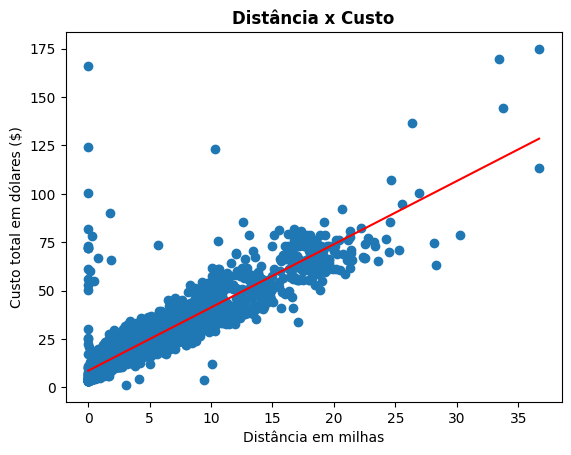

In [25]:
eixo_x = "distance"
eixo_y = "total"

beta0 = 8.641918776697056
beta1 = 3.2651658040714593

x = np.linspace(np.min(df_taxis[eixo_x]), np.max(df_taxis[eixo_x]), 100)
y = beta0 + beta1 * x

plt.scatter(df_taxis['distance'], df_taxis['total'])
plt.plot(x, y, color="red")
plt.xlabel("Distância em milhas")
plt.ylabel( "Custo total em dólares ($)")
plt.title("Distância x Custo", fontsize = 12, fontweight = "bold")
plt.show()

Com base no gráfico acima, é possível denotar que com o aumento da distância percorrida pelo táxi, há o aumento do custo da corrida. Nesse sentido, poderia ser óbvio concluir que tais variáveis apresentariam uma relação linear. No entanto, como demonstrado pelo coeficiente de Pearson, tais colunas não apresentam tal tipo de relação. Para realizar uma verificação real desses dados, seria preciso normalizar* as colunas utilizadas, estudar outros tipos de fit ou, até mesmo, investigar a presença de outliers.

*Próxima tarefa: Como podemos garantir que um atributo não terá maior influência do que outro?

In [30]:
round(coeficiente_pearson(df_taxis["distance"], df_taxis["total"]))

0

## **Conclusão**

Por fim, com base nas análises realizadas pela aliança da supernova, nota-se ser crucial a plotagem e observação de gráficos para uma observação mais visual dos dados, o que permite uma melhor compreensão das informações obtidas. Nesse sentido, também é de extrema importância a análise de estatísticas descritivas dos dados, visto que isso possibilitou notar certas características e levou a averiguações coerentes do que foi estudado.

Além disso, por fim, é perceptível para nossa guilda, que, com o intuito de mobilizar uma considerável quantidade de adeptos aos nossos ideais revolucionários e progressistas, é essencial a obtenção de um veículo próprio, de preferência que acomode muitas pessoas, visto que táxis parecem ser um meio de transporte inviável para longas viagens. Ah! Outra coisa muito importante é contratarmos um bom seguro, pois, infelizmente, nossa última carruagem foi completamente destruída enquanto estudávamos esse dataset. Enfim, acho que deveríamos ter terminado esta análise antes de colocar a carroça na frente dos bois...

## **Referências**

[1] “Seaborn Datasets For Data Science”. GeeksforGeeks, 27 de maio de 2024, https://www.geeksforgeeks.org/seaborn-datasets-for-data-science/.

[2] “Prêmio de seguro: saiba o que é e como funciona”. Mais Retorno, 6 de novembro de 2019, https://maisretorno.com/portal/termos/p/premio-de-seguro.

[3] Şenol, Ömer. “Seaborn:Datasets’s Explorations”. Medium, 21 de dezembro de 2020, https://senolomer0.medium.com/seaborn-datasetss-explorations-39d080e55e55. 

[4] “O Que Significa a Cilindrada do Motor e no Que Ela Influencia?” Blog Unidas Seminovos, 16 de maio de 2017, https://seminovos.unidas.com.br/blog/cilindrada-do-motor/.

[5] Github do Seaborn. https://github.com/mwaskom/seaborn-data?tab=readme-ov-file.

[6] "TLC Trip Record Data". New York City Taxi and Limousine Commission (TLC), 09 de agosto de 2017, https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

[7] Cassar, Daniel Roberto, "ATP-203 - Tratamento de dados". 5 de agosto de 2024.